In [1]:
#initialization
import findspark
findspark.init()
import pyspark
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('rli795').getOrCreate()
#Read csv file
df = spark.read.csv('Original-data.csv',header=True,inferSchema=True)

24/05/24 08:51:12 WARN Utils: Your hostname, lionvpdeMacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.193.17.10 instead (on interface en0)
24/05/24 08:51:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/24 08:51:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Initial Exploration

In [2]:
type(df)

pyspark.sql.dataframe.DataFrame

In [3]:
df.show(n=10)
df.columns

+------+---+----+---+---+---+---+---+---+----+----+----+----+----+----+----+--------+-------------------+---+-----------+----+----+---+---+----+---+
| Month|Day|   T|TM3|Tm4|SLP|  H| PP| VV|   V|  VM|  VG|  RA|  SN|  TS|  FG|    Date|        AQI Quality|AQI|AQI Ranking|PM25|PM10|So2|No2|  Co| O3|
+------+---+----+---+---+---+---+---+---+----+----+----+----+----+----+----+--------+-------------------+---+-----------+----+----+---+---+----+---+
|Jan-21|  1|-3.2|2.5|-10|  -| 25|  0|6.4| 9.1|  18|   -|NULL|NULL|NULL|NULL| 1/01/21|               Good| 61|         84|  41|  66| 23| 49|1.09| 29|
|Jan-21|  2|-1.5|  5| -8|  -| 30|  0|  6|   8|14.4|   -|NULL|NULL|NULL|NULL| 2/01/21|               Good| 69|        172|  48|  78| 30| 58|1.28| 23|
|Jan-21|  3|-3.1|3.6| -8|  -| 45|  0|  5| 5.4|14.4|   -|NULL|NULL|NULL|NULL| 3/01/21|Moderately Polluted|194|        322| 148| 193| 66|100|3.24|  8|
|Jan-21|  4| 2.2|8.6| -7|  -| 37|  0|4.3| 5.6|10.7|   -|NULL|NULL|NULL|NULL| 4/01/21|   Heavily Polluted|2

24/05/24 08:51:15 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


['Month',
 'Day',
 'T',
 'TM3',
 'Tm4',
 'SLP',
 'H',
 'PP',
 'VV',
 'V',
 'VM',
 'VG',
 'RA',
 'SN',
 'TS',
 'FG',
 'Date',
 'AQI Quality',
 'AQI',
 'AQI Ranking',
 'PM25',
 'PM10',
 'So2',
 'No2',
 'Co',
 'O3']

In [4]:
df.printSchema()

root
 |-- Month: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- T: string (nullable = true)
 |-- TM3: string (nullable = true)
 |-- Tm4: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- H: string (nullable = true)
 |-- PP: string (nullable = true)
 |-- VV: string (nullable = true)
 |-- V: string (nullable = true)
 |-- VM: string (nullable = true)
 |-- VG: string (nullable = true)
 |-- RA: string (nullable = true)
 |-- SN: string (nullable = true)
 |-- TS: string (nullable = true)
 |-- FG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- AQI Quality: string (nullable = true)
 |-- AQI: integer (nullable = true)
 |-- AQI Ranking: integer (nullable = true)
 |-- PM25: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- So2: integer (nullable = true)
 |-- No2: integer (nullable = true)
 |-- Co: double (nullable = true)
 |-- O3: integer (nullable = true)



In [5]:
df.select('So2', 'AQI', 'PM25','PM10').describe().show()

+-------+------------------+------------------+-----------------+-----------------+
|summary|               So2|               AQI|             PM25|             PM10|
+-------+------------------+------------------+-----------------+-----------------+
|  count|              1095|              1095|             1095|             1095|
|   mean| 9.325114155251141|102.25022831050228| 68.5607305936073|92.45205479452055|
| stddev|11.055876834442596| 70.79867843303101|63.87000989509525|73.49028485381326|
|    min|                 1|                18|                5|                0|
|    max|                81|               478|              476|              772|
+-------+------------------+------------------+-----------------+-----------------+



In [6]:
df.describe().show()

+-------+------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+----+----+----+----+-------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+
|summary| Month|               Day|                 T|              TM3|               Tm4|              SLP|                H|                PP|                VV|                 V|                VM|                VG|  RA|  SN|  TS|  FG|   Date|      AQI Quality|               AQI|       AQI Ranking|             PM25|             PM10|               So2|               No2|                Co|                O3|
+-------+------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+----------------

In [7]:
print("Total data points:", df.count())

Total data points: 1096


In [8]:
#Using pandas library to read the source file
pddf=pd.read_csv('Original-data.csv')

In [9]:
#make sure the pddf is in the right format
type(pddf)
pddf['So2'].describe()
pddf.describe()

,Day,AQI,AQI Ranking,PM25,PM10,So2,No2,Co,O3
count,1096.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,15.732664,102.250228,228.951598,68.560731,92.452055,9.325114,45.201826,1.121516,58.353425
std,8.805388,70.798678,120.906662,63.870010,73.490285,11.055877,22.983429,0.963645,38.478278
min,1.000000,18.000000,1.000000,5.000000,0.000000,1.000000,10.000000,0.220000,2.000000
25%,8.000000,52.000000,115.000000,24.500000,42.000000,2.000000,29.000000,0.580000,28.500000
50%,16.000000,83.000000,264.000000,51.000000,76.000000,5.000000,40.000000,0.850000,53.000000
75%,23.000000,130.500000,344.000000,90.000000,120.000000,12.000000,56.000000,1.235000,82.000000
max,31.000000,478.000000,367.000000,476.000000,772.000000,81.000000,152.000000,8.110000,177.000000


In [10]:
pddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        1096 non-null   object 
 1   Day          1096 non-null   int64  
 2   T            1096 non-null   object 
 3   TM3          1096 non-null   object 
 4   Tm4          1096 non-null   object 
 5   SLP          1096 non-null   object 
 6   H            1096 non-null   object 
 7   PP           1096 non-null   object 
 8   VV           1096 non-null   object 
 9   V            1096 non-null   object 
 10  VM           1096 non-null   object 
 11  VG           1096 non-null   object 
 12  RA           295 non-null    object 
 13  SN           44 non-null     object 
 14  TS           91 non-null     object 
 15  FG           83 non-null     object 
 16  Date         1095 non-null   object 
 17  AQI Quality  1095 non-null   object 
 18  AQI          1095 non-null   float64
 19  AQI Ra

Some Graphs

<Axes: >

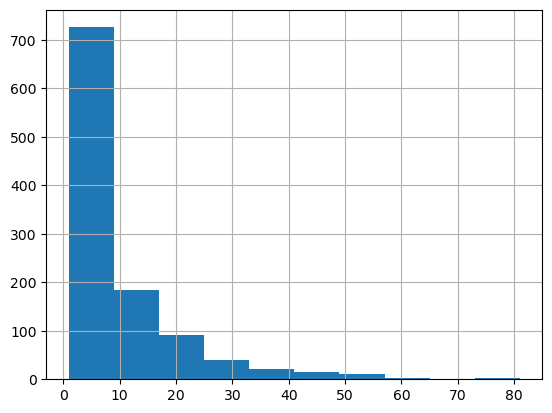

In [11]:
pddf['So2'].hist(bins=10)

<Axes: >

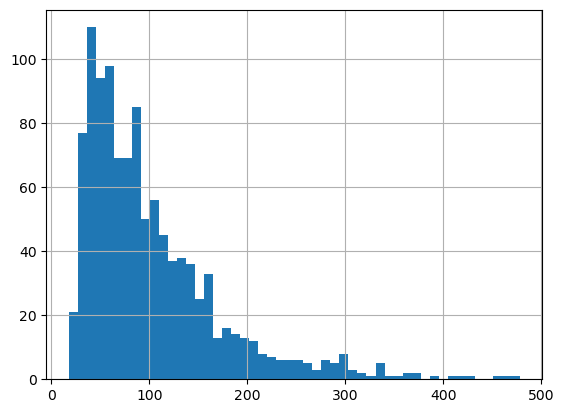

In [12]:
pddf['AQI'].hist(bins=50)

<Axes: >

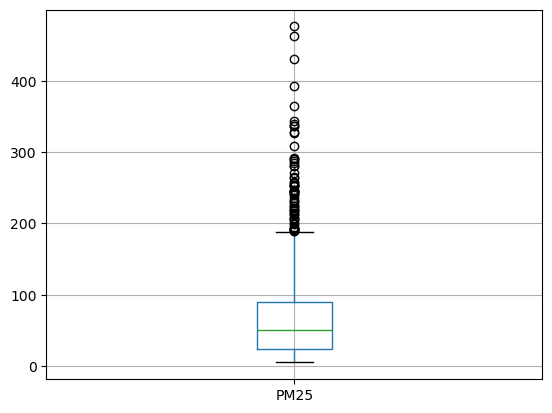

In [13]:
pddf.boxplot(column='PM25')

<Axes: >

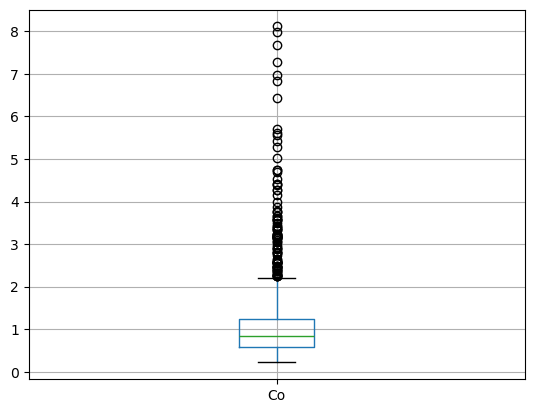

In [14]:
pddf.boxplot(column='Co')

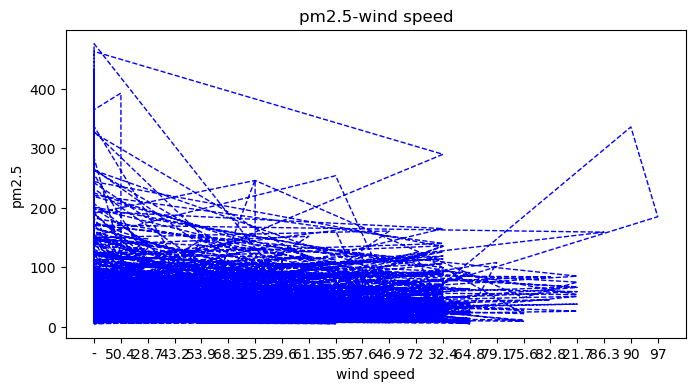

In [15]:
x=pddf['VG']
y=pddf['PM25']
plt.figure(figsize=(8,4))
plt.plot(x,y,"b--",linewidth=1)
plt.xlabel('wind speed')
plt.ylabel('pm2.5')
plt.title('pm2.5-wind speed')
plt.show()

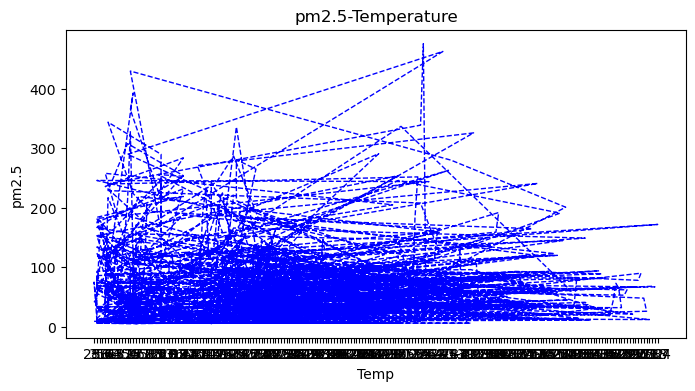

In [16]:
x=pddf['TM3']
y=pddf['PM25']
plt.figure(figsize=(8,4))
plt.plot(x,y,"b--",linewidth=1)
plt.xlabel('Temp')
plt.ylabel('pm2.5')
plt.title('pm2.5-Temperature')
plt.show()

<Axes: >

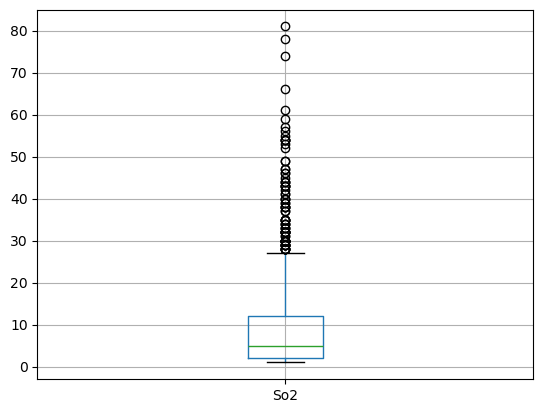

In [17]:
pddf.boxplot(column='So2')

<Axes: >

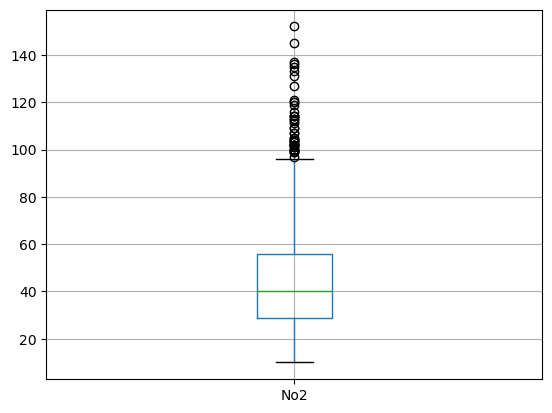

In [18]:
pddf.boxplot(column='No2')

In [19]:
#Check the null values
pddf.info()
pddf.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        1096 non-null   object 
 1   Day          1096 non-null   int64  
 2   T            1096 non-null   object 
 3   TM3          1096 non-null   object 
 4   Tm4          1096 non-null   object 
 5   SLP          1096 non-null   object 
 6   H            1096 non-null   object 
 7   PP           1096 non-null   object 
 8   VV           1096 non-null   object 
 9   V            1096 non-null   object 
 10  VM           1096 non-null   object 
 11  VG           1096 non-null   object 
 12  RA           295 non-null    object 
 13  SN           44 non-null     object 
 14  TS           91 non-null     object 
 15  FG           83 non-null     object 
 16  Date         1095 non-null   object 
 17  AQI Quality  1095 non-null   object 
 18  AQI          1095 non-null   float64
 19  AQI Ra

,Month,Day,T,TM3,Tm4,SLP,H,PP,VV,V,...,Date,AQI Quality,AQI,AQI Ranking,PM25,PM10,So2,No2,Co,O3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1093,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1094,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


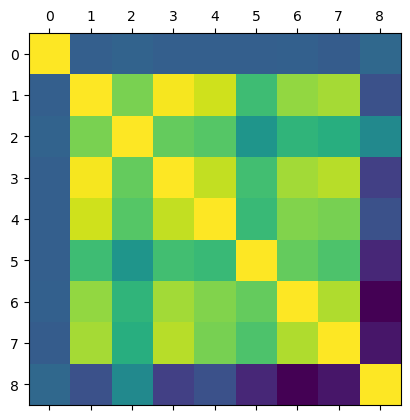

In [20]:
#correlation heatmap

numeric_pddf = pddf.select_dtypes(include=['float64', 'int64'])
plt.matshow(numeric_pddf.corr())
plt.show()  


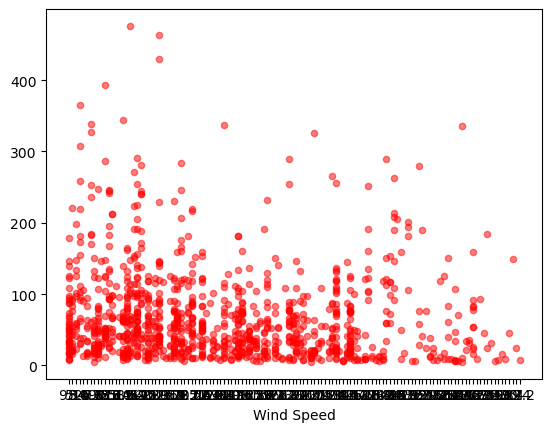

In [21]:
x=pddf['V']
y=pddf['PM25']
plt.figure('Scatter-Wind-PM')
ax=plt.gca()
ax.set_xlabel('Wind Speed')
#ax.set_ylable('PM2.5')
ax.scatter(x, y, c='r', s=20, alpha=0.5)
plt.show()

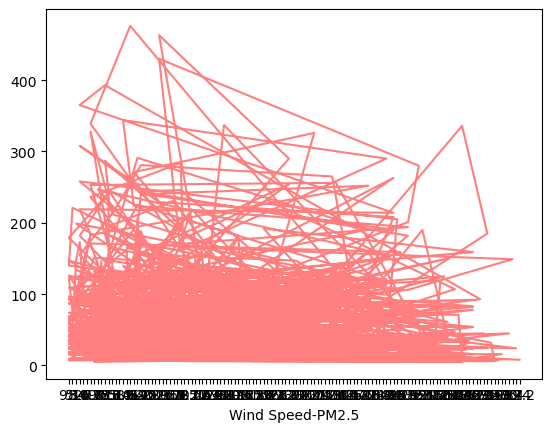

In [22]:
x=pddf['V']
y=pddf['PM25']
plt.figure('Line-Wind-PM')
ax=plt.gca()
ax.set_xlabel('Wind Speed-PM2.5')
ax.plot(x, y, c='r',alpha=0.5)
plt.show()

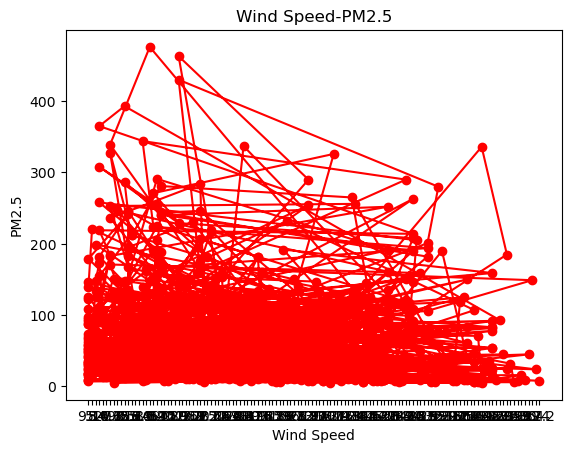

In [23]:
xline = pddf['V']
yline = pddf['PM25']
plt.ylabel('PM2.5')
plt.xlabel('Wind Speed')
plt.plot(xline, yline, color='red', marker='o', linestyle='solid')
plt.title('Wind Speed-PM2.5')
plt.show()

# DATA CLEANING

In [24]:
df.printSchema()
df.toPandas().info()
print(df.toPandas().isnull().sum())

root
 |-- Month: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- T: string (nullable = true)
 |-- TM3: string (nullable = true)
 |-- Tm4: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- H: string (nullable = true)
 |-- PP: string (nullable = true)
 |-- VV: string (nullable = true)
 |-- V: string (nullable = true)
 |-- VM: string (nullable = true)
 |-- VG: string (nullable = true)
 |-- RA: string (nullable = true)
 |-- SN: string (nullable = true)
 |-- TS: string (nullable = true)
 |-- FG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- AQI Quality: string (nullable = true)
 |-- AQI: integer (nullable = true)
 |-- AQI Ranking: integer (nullable = true)
 |-- PM25: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- So2: integer (nullable = true)
 |-- No2: integer (nullable = true)
 |-- Co: double (nullable = true)
 |-- O3: integer (nullable = true)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 10

In [25]:
count_all = df.groupBy(df.columns)\
.count()\
.where("count > 1")

print(count_all) 
# no duplicates

# emrge with the original data set, retaining only duplicate rows 
duplicates = df.join(count_all, on = df.columns, how="inner")

# show duplicates rows 
duplicates.show(5)


DataFrame[Month: string, Day: int, T: string, TM3: string, Tm4: string, SLP: string, H: string, PP: string, VV: string, V: string, VM: string, VG: string, RA: string, SN: string, TS: string, FG: string, Date: string, AQI Quality: string, AQI: int, AQI Ranking: int, PM25: int, PM10: int, So2: int, No2: int, Co: double, O3: int, count: bigint]
+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+-----------+---+-----------+----+----+---+---+---+---+-----+
|Month|Day|  T|TM3|Tm4|SLP|  H| PP| VV|  V| VM| VG| RA| SN| TS| FG|Date|AQI Quality|AQI|AQI Ranking|PM25|PM10|So2|No2| Co| O3|count|
+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+-----------+---+-----------+----+----+---+---+---+---+-----+
+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+-----------+---+-----------+----+----+---+---+---+---+-----+



In [26]:
#Drop some columns - Reduce the dataset
#pddf.drop(['CH4','NMHC','THC','UVB','RAINFALL','RAIN_COND','PH_RAIN','station','time','PM10','WS_HR','WD_HR'],axis=1,inplace=True)
pddf.drop(['TM3', 'Tm4' , 'VM', 'VG'],axis=1,inplace=True)

In [27]:
pddf.info()
pddf.describe()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        1096 non-null   object 
 1   Day          1096 non-null   int64  
 2   T            1096 non-null   object 
 3   SLP          1096 non-null   object 
 4   H            1096 non-null   object 
 5   PP           1096 non-null   object 
 6   VV           1096 non-null   object 
 7   V            1096 non-null   object 
 8   RA           295 non-null    object 
 9   SN           44 non-null     object 
 10  TS           91 non-null     object 
 11  FG           83 non-null     object 
 12  Date         1095 non-null   object 
 13  AQI Quality  1095 non-null   object 
 14  AQI          1095 non-null   float64
 15  AQI Ranking  1095 non-null   float64
 16  PM25         1095 non-null   float64
 17  PM10         1095 non-null   float64
 18  So2          1095 non-null   float64
 19  No2   

,Day,AQI,AQI Ranking,PM25,PM10,So2,No2,Co,O3
count,1096.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,15.732664,102.250228,228.951598,68.560731,92.452055,9.325114,45.201826,1.121516,58.353425
std,8.805388,70.798678,120.906662,63.870010,73.490285,11.055877,22.983429,0.963645,38.478278
min,1.000000,18.000000,1.000000,5.000000,0.000000,1.000000,10.000000,0.220000,2.000000
25%,8.000000,52.000000,115.000000,24.500000,42.000000,2.000000,29.000000,0.580000,28.500000
50%,16.000000,83.000000,264.000000,51.000000,76.000000,5.000000,40.000000,0.850000,53.000000
75%,23.000000,130.500000,344.000000,90.000000,120.000000,12.000000,56.000000,1.235000,82.000000
max,31.000000,478.000000,367.000000,476.000000,772.000000,81.000000,152.000000,8.110000,177.000000


In [28]:
#Drop Null Values
pddf.dropna(axis=0,how='any',inplace=True)

In [29]:
#Simply deal with the extreme values (Using Pandas)
pddf = pddf.replace("-", pd.NA)
binary_columns = ["RA", "SN", "TS", "FG"] 
for col in binary_columns:
    pddf[col] = pddf[col].replace("o", 1).fillna(0)


In [30]:
#Re-Index the pandas dataframe
pddf.reset_index(drop=True,inplace=True)

In [31]:
#Delete abnormal values - such as negative values, extreme values
#May take long time to run

# Define conditions to filter out abnormal values
conditions = (
    pddf.isin(['NR']).any(axis=1) |  # Check if any value in the row is 'NR'
    (pddf['Co'] < 0) | (pddf['Co'] > 100) |
    (pddf['V'] < 0) | (pddf['V'] > 100) |
    (pddf['PM25'] > 1000) | (pddf['PM25'] < 0) |
    (pddf['So2'] < 0) | (pddf['So2'] > 1000) |
    (pddf['No2'] < 0) | (pddf['No2'] > 1000)
    # ... add conditions for other attributes
)

# Drop rows that meet any of the conditions
pddf = pddf[~conditions].copy()  # Invert conditions to keep only valid rows

        

In [32]:
#re-index again
pddf.reset_index(drop=True,inplace=True)

In [33]:
from pyspark.sql.functions import when, col


# Create season column
df = df.withColumn("Season", when(col("Month").isin("12", "1", "2"), "Winter")
                             .when(col("Month").isin("3", "4", "5"), "Spring")
                             .when(col("Month").isin("6", "7", "8"), "Summer")
                             .otherwise("Autumn"))

# Create temperature range column
df = df.withColumn("TempRange", col("TM3") - col("Tm4"))

# Create temperature range column
df = df.withColumn("TempRange", col("TM3") - col("Tm4"))

# Create precipitation intensity column
df = df.withColumn("PrecipIntensity",
                  when(col("PP") == 0, "None")
                  .when(col("PP") <= 5, "Light")
                  .when(col("PP") <= 20, "Moderate")
                  .otherwise("Heavy"))

# Create Temperature-Humidity Index (THI) column
df = df.withColumn("THI", 0.8 * col("T") + col("H") / 100 * (col("T") - 14.4) + 46.4)

# Create Wind Chill Factor column (assuming wind speed in km/h)
df = df.withColumn("WindChill", 13.12 + 0.6215 * col("T") - 11.37 * col("V")**0.16 + 0.3965 * col("T") * col("V")**0.16)


df.printSchema()


root
 |-- Month: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- T: string (nullable = true)
 |-- TM3: string (nullable = true)
 |-- Tm4: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- H: string (nullable = true)
 |-- PP: string (nullable = true)
 |-- VV: string (nullable = true)
 |-- V: string (nullable = true)
 |-- VM: string (nullable = true)
 |-- VG: string (nullable = true)
 |-- RA: string (nullable = true)
 |-- SN: string (nullable = true)
 |-- TS: string (nullable = true)
 |-- FG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- AQI Quality: string (nullable = true)
 |-- AQI: integer (nullable = true)
 |-- AQI Ranking: integer (nullable = true)
 |-- PM25: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- So2: integer (nullable = true)
 |-- No2: integer (nullable = true)
 |-- Co: double (nullable = true)
 |-- O3: integer (nullable = true)
 |-- Season: string (nullable = false)
 |-- TempRange: double (nullable 

In [34]:
#Too many records, will cause low-memory error, so drop some records to increase performance
pddf.drop(pddf.index[:100000],axis=0,inplace=True)

In [35]:
#re-index again
pddf.reset_index(drop=True,inplace=True)

In [36]:
from pyspark.sql.functions import col, count, when

# Calculate missing values for each column
missing_value_counts = df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in df.columns]
).collect()[0].asDict()

# Print the results in a readable format
for column, count in missing_value_counts.items():
    print(f"{column}: {count} missing values")


Month: 0 missing values
Day: 0 missing values
T: 0 missing values
TM3: 0 missing values
Tm4: 0 missing values
SLP: 0 missing values
H: 0 missing values
PP: 0 missing values
VV: 0 missing values
V: 0 missing values
VM: 0 missing values
VG: 0 missing values
RA: 801 missing values
SN: 1052 missing values
TS: 1005 missing values
FG: 1013 missing values
Date: 1 missing values
AQI Quality: 1 missing values
AQI: 1 missing values
AQI Ranking: 1 missing values
PM25: 1 missing values
PM10: 1 missing values
So2: 1 missing values
No2: 1 missing values
Co: 1 missing values
O3: 1 missing values
Season: 0 missing values
TempRange: 4 missing values
PrecipIntensity: 0 missing values
THI: 5 missing values
WindChill: 4 missing values


In [37]:
df.describe()
df.describe().show()

+-------+------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+----+----+----+----+-------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------+------------------+---------------+------------------+------------------+
|summary| Month|               Day|                 T|              TM3|               Tm4|              SLP|                H|                PP|                VV|                 V|                VM|                VG|  RA|  SN|  TS|  FG|   Date|      AQI Quality|               AQI|       AQI Ranking|             PM25|             PM10|               So2|               No2|                Co|                O3|Season|         TempRange|PrecipIntensity|               THI|         WindChill|
+-

In [38]:
#Transfer to pyspark
from pyspark.sql import SQLContext
from pyspark import SparkContext
sqlContest = SQLContext(spark)
pddf=pd.read_csv('Original-data.csv')
spark_df = sqlContest.createDataFrame(pddf)

 


/opt/anaconda3/lib/python3.11/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [39]:
# delete columns:
 
columns_to_drop = ['TM', 'Tm', 'VM', 'VG', 'SLP', 'VV', 'PP', 'Month', 'Day', 'AQI Ranking']
df = df.drop(*columns_to_drop)  # 
df.show(10)
print(f"Shape of the DataFrame: ({df.count()}, {len(df.columns)})")

+----+---+---+---+----+----+----+----+----+--------+-------------------+---+----+----+---+---+----+---+------+---------+---------------+------+-------------------+
|   T|TM3|Tm4|  H|   V|  RA|  SN|  TS|  FG|    Date|        AQI Quality|AQI|PM25|PM10|So2|No2|  Co| O3|Season|TempRange|PrecipIntensity|   THI|          WindChill|
+----+---+---+---+----+----+----+----+----+--------+-------------------+---+----+----+---+---+----+---+------+---------+---------------+------+-------------------+
|-3.2|2.5|-10| 25| 9.1|NULL|NULL|NULL|NULL| 1/01/21|               Good| 61|  41|  66| 23| 49|1.09| 29|Autumn|     12.5|           None| 39.44| -6.863825411400413|
|-1.5|  5| -8| 30|   8|NULL|NULL|NULL|NULL| 2/01/21|               Good| 69|  48|  78| 30| 58|1.28| 23|Autumn|     13.0|           None| 40.43| -4.500009281966013|
|-3.1|3.6| -8| 45| 5.4|NULL|NULL|NULL|NULL| 3/01/21|Moderately Polluted|194| 148| 193| 66|100|3.24|  8|Autumn|     11.6|           None|36.045| -5.308181321035066|
| 2.2|8.6| -7| 3

In [41]:
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType, BooleanType

# Print initial schema and column types
print("Original DataFrame Schema:")
df.printSchema()

# Cast columns to desired types
df = (
    df.withColumn("T", col("T").cast(FloatType()))
    .withColumn("H", col("H").cast(FloatType()))
    .withColumn("V", col("V").cast(FloatType()))
    .withColumn("RA", col("RA").cast(BooleanType()))
    .withColumn("SN", col("SN").cast(BooleanType()))
    .withColumn("TS", col("TS").cast(BooleanType()))
    .withColumn("FG", col("FG").cast(BooleanType()))
)

# Print updated schema and column types
print("\nModified DataFrame Schema:")
df.printSchema()


Original DataFrame Schema:
root
 |-- T: string (nullable = true)
 |-- TM3: string (nullable = true)
 |-- Tm4: string (nullable = true)
 |-- H: string (nullable = true)
 |-- V: string (nullable = true)
 |-- RA: string (nullable = true)
 |-- SN: string (nullable = true)
 |-- TS: string (nullable = true)
 |-- FG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- AQI Quality: string (nullable = true)
 |-- AQI: integer (nullable = true)
 |-- PM25: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- So2: integer (nullable = true)
 |-- No2: integer (nullable = true)
 |-- Co: double (nullable = true)
 |-- O3: integer (nullable = true)
 |-- Season: string (nullable = false)
 |-- TempRange: double (nullable = true)
 |-- PrecipIntensity: string (nullable = false)
 |-- THI: double (nullable = true)
 |-- WindChill: double (nullable = true)


Modified DataFrame Schema:
root
 |-- T: float (nullable = true)
 |-- TM3: string (nullable = true)
 |-- Tm4: string (nullable =

In [42]:
 #pyspark df describe result -> pandas dataframe
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
T,1092,13.469597080633754,11.178302897265528,-14.9,32.8
TM3,1096,19.27673992673994,11.41065196120622,-,9.7
Tm4,1096,6.925274725274726,11.448850999133077,-,9.9
H,1091,52.55270394133822,21.46688765559118,8.0,98.0
V,1092,10.480036652350163,5.160226921969336,3.5,39.6
Date,1095,None,None,1/01/21,9/12/23
AQI Quality,1095,None,None,Excellent,Severely Polluted
AQI,1095,102.25022831050228,70.79867843303101,18,478
PM25,1095,68.5607305936073,63.87000989509525,5,476


# Modeling START

In [44]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [45]:
spark_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Month,1096,None,None,Apr-21,Sep-23
Day,1096,15.732664233576642,8.805388067206271,1,31
T,1096,13.469597069597068,11.178302876535033,-,9.9
TM3,1096,19.27673992673993,11.410651961206215,-,9.7
Tm4,1096,6.925274725274725,11.448850999133079,-,9.9
SLP,1096,1026.5,4.666904755831149,-,1029.8
H,1096,52.55270394133822,21.46688765559119,-,98
PP,1096,1.987713997985901,10.518343879840208,-,9.91
VV,1096,6.34906474820144,2.751739531585815,-,9.8


In [52]:
#Organise the input columns - Select the data
vector_assembler = VectorAssembler(inputCols = ['AQI','PM25','PM10','So2','No2','Co','O3'], outputCol = 'features')
vector_output = vector_assembler.transform(spark_df)

In [48]:
vector_output.printSchema()
vector_output.head(1)

root
 |-- Month: string (nullable = true)
 |-- Day: long (nullable = true)
 |-- T: string (nullable = true)
 |-- TM3: string (nullable = true)
 |-- Tm4: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- H: string (nullable = true)
 |-- PP: string (nullable = true)
 |-- VV: string (nullable = true)
 |-- V: string (nullable = true)
 |-- VM: string (nullable = true)
 |-- VG: string (nullable = true)
 |-- RA: string (nullable = true)
 |-- SN: string (nullable = true)
 |-- TS: string (nullable = true)
 |-- FG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- AQI Quality: string (nullable = true)
 |-- AQI: double (nullable = true)
 |-- AQI Ranking: double (nullable = true)
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- So2: double (nullable = true)
 |-- No2: double (nullable = true)
 |-- Co: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(Month='Jan-21', Day=1, T='-3.2', TM3='2.5', Tm4='-10', SLP='-', H='25', PP='0', VV='6.4', V='9.1', VM='18', VG='-', RA='NaN', SN='NaN', TS='NaN', FG='NaN', Date='1/01/21', AQI Quality='Good', AQI=61.0, AQI Ranking=84.0, PM25=41.0, PM10=66.0, So2=23.0, No2=49.0, Co=1.09, O3=29.0, features=DenseVector([61.0, 41.0, 66.0, 23.0, 49.0, 1.09, 29.0]))]

In [53]:
# Select data
vector_output = vector_output.select(['features'])
print(vector_output.head(1))
vector_output.show(5)





[Row(features=DenseVector([61.0, 41.0, 66.0, 23.0, 49.0, 1.09, 29.0]))]
+--------------------+
|            features|
+--------------------+
|[61.0,41.0,66.0,2...|
|[69.0,48.0,78.0,3...|
|[194.0,148.0,193....|
|[217.0,173.0,224....|
|[154.0,106.0,156....|
+--------------------+
only showing top 5 rows



In [54]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, when, regexp_replace, mean
from pyspark.sql.types import FloatType

import numpy as np

# Input validation and data preparation (same as before)
# (Assuming you've already read the CSV into 'df' and cleaned/converted data as needed)
from pyspark.sql.functions import col, when, regexp_replace

# Filter out rows where AQI is not numeric or contains '-'
filtered_df = df.filter((col("AQI") != "-") & (col("AQI").rlike("^[0-9]*\.?[0-9]*$")))

# Convert columns to float
for column_name in ['T', 'H', 'V', 'PM25', 'PM10', 'So2', 'No2', 'Co', 'O3']:
    filtered_df = filtered_df.withColumn(column_name, col(column_name).cast("float"))

# Convert AQI to numeric (float) and fill missing values with the mean


# 在转换为数值之前过滤掉无效的 AQI 值
filtered_df = df.filter(col("AQI").rlike("^[0-9]*\.?[0-9]*$")) 

# 将 AQI 转换为数值型 (float)
filtered_df = filtered_df.withColumn("AQI", col("AQI").cast("float"))

# 过滤后再计算平均值
mean_aqi = filtered_df.select(mean(col("AQI"))).collect()[0][0]

# 使用平均值填充缺失的 AQI 值
filtered_df = filtered_df.fillna(mean_aqi, subset=["AQI"])







# Drop rows with NaN values in AQI after conversion
df = filtered_df.na.drop(subset=["AQI"])

# Feature vector assembly
featureCols = ['PM25','PM10','So2','No2','Co','O3']
assembler = VectorAssembler(inputCols=featureCols, outputCol='features')

# Create a LinearRegression object
linreg = LinearRegression(featuresCol='features', labelCol='AQI')

# Chain indexer and tree in a Pipeline
pipeline = Pipeline(stages=[assembler, linreg])

# Split the data into training and test sets (70% held out for training)
(trainingData, testData) = df.randomSplit([0.7, 0.3])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "AQI", "features").show(5)

# Get evaluation metrics
evaluator_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="AQI", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)

evaluator_mse = RegressionEvaluator(predictionCol="prediction", labelCol="AQI", metricName="mse")
mse = evaluator_mse.evaluate(predictions)

evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="AQI", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)

# Print evaluation metrics
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print("Mean Squared Error (MSE) on test data = %g" % mse)
print("R-squared on test data = %g" % r2)

# Summary statistics of AQI
df.describe(['AQI']).show()


24/05/24 09:17:30 WARN Instrumentation: [15a0bc32] regParam is zero, which might cause numerical instability and overfitting.
24/05/24 09:17:30 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/24 09:17:30 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


+------------------+-----+--------------------+
|        prediction|  AQI|            features|
+------------------+-----+--------------------+
|  107.825889605618|104.0|[77.0,117.0,6.0,6...|
|334.88872417038306|329.0|[280.0,329.0,21.0...|
| 36.72642776964326| 42.0|[8.0,41.0,3.0,11....|
| 83.51819877006466| 80.0|[56.0,82.0,20.0,5...|
|  72.5330359323435| 67.0|[48.0,58.0,20.0,4...|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 10.402
Mean Squared Error (MSE) on test data = 108.203
R-squared on test data = 0.981363
+-------+------------------+
|summary|               AQI|
+-------+------------------+
|  count|              1095|
|   mean|102.25022831050228|
| stddev| 70.79867843303101|
|    min|              18.0|
|    max|             478.0|
+-------+------------------+



In [ ]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col, when, count

# Define a function to build and evaluate a classification model
def cmodel(classifier, df, predictors, label_col):
    # Convert label column to numeric using StringIndexer (if it's not already)
    labelIndexer = StringIndexer(inputCol=label_col, outputCol="indexedLabel").fit(df)

    # Assemble features into a vector
    assembler = VectorAssembler(inputCols=predictors, outputCol="features")

    # Chain indexer, assembler, and model in a Pipeline
    pipeline = Pipeline(stages=[labelIndexer, assembler, classifier])

    # Split the data into training and test sets (70% for training, 30% for testing)
    (trainingData, testData) = df.randomSplit([0.7, 0.3], seed=1)

    # Define parameter grid for cross-validation (adjust as needed)
    paramGrid = ParamGridBuilder() \
        .addGrid(classifier.maxDepth, [5, 10, 20]) \
        .addGrid(classifier.maxBins, [20, 32, 64]) \
        .build()

    # Create CrossValidator
    crossval = CrossValidator(estimator=pipeline,
                              estimatorParamMaps=paramGrid,
                              evaluator=BinaryClassificationEvaluator(labelCol="indexedLabel"),
                              numFolds=5)  # 5-fold cross-validation

    # Train model with cross-validation
    cvModel = crossval.fit(trainingData)

    # Make predictions on the test data
    predictions = cvModel.transform(testData)

    # Select and display example rows
    predictions.select("prediction", "indexedLabel", "features").show(5)

    # Evaluate the best model from cross-validation
    evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel")
    accuracy = evaluator.evaluate(predictions)
    print(f"Test Accuracy of {classifier.__class__.__name__}: {accuracy:.3f}\n")

    # Show the best model parameters
    bestModel = cvModel.bestModel
    bestParams = bestModel.stages[-1].extractParamMap()
    print("Best Parameters:")
    for param, value in bestParams.items():
        print(f"\t{param}: {value}")
    print("\n")


# Define predictor columns for classification models
predictor=['RA','SN','TS','FG']

# Create a binary label for high AQI
df = df.withColumn("HighAQI", when(col("AQI") > 300, 1.0).otherwise(0.0))
df = df.na.drop(subset=["HighAQI"])
df = df.withColumn("HighAQI", col("HighAQI").cast("int"))
# Filter for high AQI values
high_aqi_df = df.filter(col("AQI") > 300)

# Filter out rows where AQI is not numeric or contains '-'
filtered_df = df.filter((col("AQI") != "-") & (col("AQI").rlike("^[0-9]*\.?[0-9]*$")))

# Convert columns to float
for column_name in ['T', 'H', 'V', 'PM25', 'PM10', 'So2', 'No2', 'Co', 'O3']:
    filtered_df = filtered_df.withColumn(column_name, col(column_name).cast("float"))

# Convert AQI to numeric (float) and fill missing values with the mean


# ... other code ...

 
 




# Filter out invalid AQI values before converting to numeric
filtered_df = df.filter(col("AQI").rlike("^[0-9]*\.?[0-9]*$")) 

# Convert AQI to numeric (float)
filtered_df = filtered_df.withColumn("AQI", col("AQI").cast("float"))

# Calculate mean AQI after filtering ONLY if the dataframe is NOT empty
if filtered_df.count() > 0: 
    mean_aqi = filtered_df.select(mean(col("AQI"))).collect()[0][0]
else:
    mean_aqi = 0  # Or choose a different default value or imputation strategy

# Impute missing AQI values with the mean
filtered_df = filtered_df.fillna(mean_aqi, subset=["AQI"])

df = filtered_df

# Get descriptive statistics for predictor columns in high_aqi_df
predictor_stats = high_aqi_df.select(predictor).describe()

# Show the descriptive statistics
print("\nDescriptive Statistics for High AQI Predictors:")
predictor_stats.show()

# Define predictor columns for classification models
predictors = ['RA','SN','TS','FG']

# Build and evaluate the classification models
cmodel(LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8), df, predictors, 'HighAQI')
cmodel(DecisionTreeClassifier(maxDepth=5, maxBins=32), df, predictors, 'HighAQI')
cmodel(RandomForestClassifier(numTrees=100, maxDepth=4, maxBins=32), df, predictors, 'HighAQI')


In [ ]:
#Split Data; try to avoid overfitting, and increase accuracy
#70% and 30% is a common split method for the usual dataset, so I choose this
train_data,test_data = vector_output.randomSplit([0.7,0.3])
train_data.describe().show()
test_data.describe().show()

In [ ]:
#Linear Regression Model
lr = LinearRegression(featuresCol='features', labelCol='PM25')

# Fit the training data.
lr_model = lr.fit(train_data)

# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))


In [ ]:
# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")
# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(training_summary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(training_summary.r2))

In [ ]:
import numpy as np
beta = np.sort(lr_model.coefficients)
# Plot the data.
plt.plot(beta)
# Add a label to the data.
plt.ylabel('Coefficients')
# Show the graph. 
plt.show()

In [ ]:
train_data.describe().show()

In [ ]:
#Evaluate the model with the test data.
test_results = lr_model.evaluate(test_data)
rmse=test_results.rootMeanSquaredError
r2=test_results.r2
# Print the RMSE/R2. 
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

In [ ]:
#Linear Regression version 1 Above
#Linear Regression version 2 below

In [ ]:
#Split method 2
splits = vector_output.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [ ]:
#Linear Regression Version 2
lr = LinearRegression(featuresCol = 'features', labelCol='PM25')
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

In [ ]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
train_df.describe().show()

In [ ]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","PM25","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="PM25",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

In [ ]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

In [ ]:
#Linear Regression version 2 above ENDs----
#Decision Tree Regression START------

In [ ]:
#Decision Tree Regression
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'PM25')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="PM25", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

In [ ]:
#DTR Feature importances
dt_model.featureImportances

In [ ]:
#DTR
vector_output.take(1)

In [ ]:
#Decision Tree Above--------ENDS

In [ ]:
#Logistic Regression--------BEGINS
from pyspark.ml.feature import (OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
AMB_indexer = StringIndexer(inputCol='AMB_TEMP',outputCol='AMBIndex')
NO_indexer = StringIndexer(inputCol='NO',outputCol='NOIndex')
NO2_indexer = StringIndexer(inputCol='NO2',outputCol='NO2Index')
Nox_indexer = StringIndexer(inputCol='Nox',outputCol='NoxIndex')
Windspeed_indexer = StringIndexer(inputCol='WIND_SPEED',outputCol='WindspeedIndex')
Winddirec_indexer = StringIndexer(inputCol='WIND_DIREC',outputCol='WinddirecIndex')
PM25_indexer = StringIndexer(inputCol='PM25',outputCol='PM25Index')
SO2_indexer = StringIndexer(inputCol='SO2',outputCol='SO2Index')
O3_indexer = StringIndexer(inputCol='O3',outputCol='O3Index')
RH_indexer = StringIndexer(inputCol='RH',outputCol='RHIndex')

#encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
AMB_encoder = OneHotEncoder(inputCol='AMBIndex',outputCol='AMBVec')
NO_encoder = OneHotEncoder(inputCol='NOIndex',outputCol='NOVec')
NO2_encoder = OneHotEncoder(inputCol='NO2Index',outputCol='NO2Vec')
Nox_encoder = OneHotEncoder(inputCol='NoxIndex',outputCol='NoxVec')
Windspeed_encoder = OneHotEncoder(inputCol='WindspeedIndex',outputCol='WindSVec')
Winddirec_encoder = OneHotEncoder(inputCol='WinddirecIndex',outputCol='WindDVec')
PM25_encoder = OneHotEncoder(inputCol='PM25Index',outputCol='PM25Vec')
SO2_encoder = OneHotEncoder(inputCol='SO2Index',outputCol='So2Vec')
O3_encoder = OneHotEncoder(inputCol='O3Index',outputCol='O3Vec')
RH_encoder = OneHotEncoder(inputCol='RHIndex',outputCol='RHVec')

# using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['AMB_TEMP', 'CO', 'NO', 'NO2', 'Nox', 'O3','RH', 'SO2', 'WIND_DIREC', 'WIND_SPEED'], outputCol="features")

In [ ]:
pipeline = Pipeline(stages=[AMB_indexer, NO_indexer, NO2_indexer, Nox_indexer,
                            Windspeed_indexer, Winddirec_indexer, PM25_indexer, SO2_indexer,
                            O3_indexer, RH_indexer,assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(spark_df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(spark_df)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('PM25Index', 'features')

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
lrtrain_data, lrtest_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(lrtrain_data.count()))
print("Test Dataset Count: " + str(lrtest_data.count()))

# Instantiate the model.
lor_model = LogisticRegression(featuresCol='features',labelCol='PM25Index')

# Fit the model.
lor_model = lor_model.fit(lrtrain_data)

# And evaluate the model using the test data.
lrresults = lor_model.transform(lrtest_data)

In [ ]:
import numpy as np

intercept = lor_model.interceptVector

#print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
# Plot the data.
plt.plot(intercept)

# Add a label to the data.
plt.ylabel('Intercept')

# Show the graph. 
plt.show()

In [ ]:
lrcoefficients=str(lor_model.coefficientMatrix)
print("Coefficients: " + str(lor_model.coefficientMatrix))
plt.plot(lrcoefficients)

# Add a label to the data.
plt.ylabel('lrcoefficients')

# Show the graph. 
plt.show()

In [ ]:
#Logistic Regreesion Above ENDS--------
#G-Boosted Tree Regression below-----STARTS

In [ ]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'PM25')
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'PM25', 'features').show(5)

In [ ]:
gbt_evaluator = RegressionEvaluator(labelCol="PM25", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

In [ ]:
#G-Boost Tree Regression Above ENDS---------------
#KMEANS Below STARTS-------------

In [ ]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol = 'features', outputCol = 'scaledFeatures')
scaler_model = scaler.fit(vector_output)
final_df = scaler_model.transform(vector_output)
final_df.show(3)

In [ ]:
final_df.take(1)

In [ ]:
from pyspark.ml.clustering import KMeans
kmeans = KMeans(featuresCol = 'scaledFeatures', k=3)
model = kmeans.fit(final_df)

In [ ]:
print('WSSSE:', model.computeCost(final_df))

In [ ]:
centers = model.clusterCenters()
print(centers)

In [ ]:
model.transform(final_df).select('scaledFeatures', 'prediction').show()

In [ ]:
#ENDS

In [ ]:
Descriptive Statistics for High AQI Predictors:
+-------+----+----+----+----+
|summary|  RA|  SN|  TS|  FG|
+-------+----+----+----+----+
|  count|  27|  27|  27|  20|
|   mean|NULL|NULL|NULL|NULL|
| stddev|NULL|NULL|NULL|NULL|
|    min|   -|   -|   -|   -|
|    max|   -|   o|   -|   o|
+-------+----+----+----+----+